In [14]:
import matplotlib.pyplot as plt
%matplotlib inline

In [104]:
import random

In [199]:
class BSTNode:
    def __init__(self, parent=None):
        self.value = None
        self.parent = parent
        self.left = None
        self.right = None
        
    def insert(self, value):
        """Plain BST-like insert"""

        if self.value == value:
            return self
        
        if self.value is None:
            self.value = value
            self.left = Node(parent=self)
            self.right = Node(parent=self)
            return self

        next_node = self.right if self.value < value else self.left
        return next_node.insert(value)
    
    def is_root(self) -> bool:
        return self.parent is None

    def is_right(self) -> bool:
        assert not self.is_root()
        return self.parent.right == self
    
    def is_left(self) -> bool:
        assert not self.is_root()
        return self.parent.left == self
    
    def height(self):
        if self.value is None:
            return 0
        return 1 + max(self.left.height(), self.right.height())
    
    def grandparent(self):
        assert (self.parent is not None) and \
               (self.parent.parent is not None)
        return self.parent.parent

    def uncle(self):
        if self.grandparent().left == self.parent:
            return self.grandparent().right
        else:
            return self.grandparent().left

    def right_rotate(self):
        previuous_left = self.left
        previuous_left.parent = self.parent
        self.left = previuous_left.right
        self.parent = previuos_left
        previuos_left.right = self
        
    def left_rotate(self):
        previuous_right = self.right
        previuous_right.parent = self.parent
        self.right = previuous_right.left
        self.parent = previuos_right
        previuos_right.left = self
        
    def __iter__(self):
        def iter_nodes():
            

In [ ]:
class Node:
#     def __init__(self, parent=None):
#         self.value = None
#         self.color = 'black'
#         self.parent = parent
#         self.left = None
#         self.right = None
        
#     def insert(self, value):
#         new_node = self._insert(value)
#         new_node.color = 'red'
#         new_node.balance()
#         return new_node
        
#     def _insert(self, value):
#         """Plain BST-like insert"""

#         if self.value == value:
#             return self
        
#         if self.value is None:
#             self.value = value
#             self.left = Node(parent=self)
#             self.right = Node(parent=self)
#             return self

#         next_node = self.right if self.value < value else self.left
#         return next_node._insert(value)
        
#     def balance(self):
#         if self.is_root():
#             self.color = 'black'
#             return

#         if not (self.color == self.parent.color == 'red'):
#             return
        
#         # Here we have checked that both this node
#         # and it's parent are red.
#         # Since root is never red, this node has a grandparent
#         assert self.grandparent().color == 'black'
        
#         if self.uncle().color == 'red':
#             self.grandparent().recolor()
#             return
        
#         if 
        
#     def recolor(self):
#         """Recolor node to red and its children to black"""
#         assert self.color == 'black'
#         assert self.left.color == self.right.color == 'red'
        
#         self.color = 'red'
#         self.left.color = 'black'
#         self.right.color = 'black'
#         self.balance()
    
   

In [200]:
tree = BSTNode()

In [201]:
for i in range(15):
    tree.insert(random.randint(0, 10000))

AttributeError: 'BSTNode' object has no attribute 'color'

In [202]:
def _get_data_to_plot(node, x, y, max_y):
    links = []
    points = []
    
    points.append(((x, y), node.color, node.value))
    
    space = 2**(max_y - abs(y))
    
    if node.left is not None:
        left_y = y-1 if node.left.color == 'red' else y-1
        _links, _points = _get_data_to_plot(node.left, x-space, left_y, max_y)
        links.append((((x, y), (x-space, left_y)), node.left.color))
        
        links += _links
        points += _points
        
    if node.right is not None:
        right_y = y-1 if node.right.color == 'red' else y-1
        _links, _points = _get_data_to_plot(node.right, x+space, right_y, max_y)
        links.append((((x, y), (x+space, right_y)), node.right.color))
        
        links += _links
        points += _points
        
    return links, points

AttributeError: 'BSTNode' object has no attribute 'color'

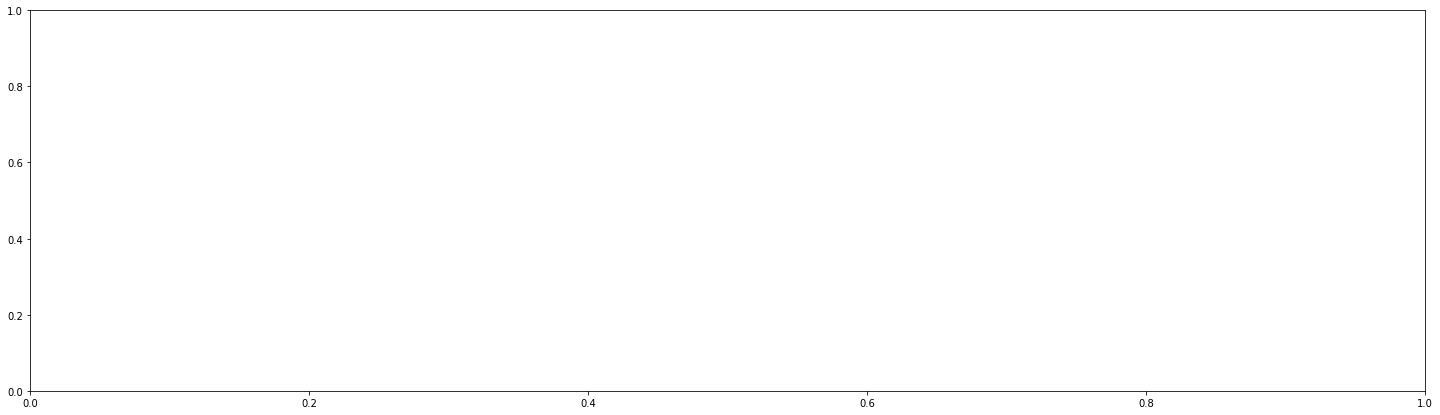

In [203]:
fig, ax = plt.subplots(figsize=(25, 7))

links, points = _get_data_to_plot(tree, 0, 0, tree.height())

for link, color in links:
    ax.plot(*zip(*link), color=color, lw=1, zorder=1)

points_coords, points_colors, points_values = tuple(zip(*points))
ax.scatter(*zip(*points_coords),
           s=30, color=points_colors, zorder=2, edgecolor='black')

for xy, value in zip(points_coords, points_values):
    ax.annotate(value, (xy[0] + 0.1, xy[1] + 0.1))